# <center><span style="color:red;"> <b> Medical Cost Personal Datasets </b></span></center>

<p align="center">
    <strong> </strong> <a href="https://www.kaggle.com/datasets/mirichoi0218/insurance"> Kaggle - Insurance Dataset Link</a>
</p>

## <center><span style="text-decoration: underline;">Exploratory Data Analysis (EDA) + Linear Regression </span></center>

<h4 style="margin-bottom: 0;">📝 Dataset Description: Medical Cost Personal Datasets </h4>

- **`age`**: Age of the primary beneficiary.
- **`sex`**: Gender of the insurance contractor (*female* or *male*).
- **`bmi`**: Body Mass Index (BMI), providing an understanding of body weight relative to height.
  - BMI is calculated as weight (kg) / height (m²).
  - Ideally, BMI should be in the range of **18.5 to 24.9**.
- **`children`**: Number of children covered by health insurance (dependents).
- **`smoker`**: Indicates whether the individual smokes (*yes* or *no*).
- **`region`**: Residential area of the beneficiary in the United States:
  - Northeast
  - Southeast
  - Southwest
  - Northwest
- **`charges`**: Individual medical costs billed by health insurance.

Source: ["Medical Cost Personal Datasets" (kaggle.com)](https://www.kaggle.com/datasets/mirichoi0218/insurance/) 

## <div style="text-align:center; border-radius:30px 30px; padding:7px; color:white; margin:0; font-size:90%; font-family:Pacifico; background-color:#3170af; overflow:hidden"><b> Table of Content </b></div>

1. [Import Libraries](#chapter1)
2. [Initialize Functions](#chapter2)
3. [Descriptive Statistics](#chapter3)
4. [Feature Engineering](#chapter4)
5. [Graphical + Statistical Analyses](#chapter5)    
    &emsp; 5.1 [Insurance Charges](#chapter5a)  
    &emsp; 5.2 [Insurance Charges and Gender](#chapter5b)  
    &emsp; 5.3 [Insurance Charges and Smoking Status](#chapter5c)  
    &emsp; 5.4 [Insurance Charges across Regions](#chapter5d)              
    &emsp; 5.5 [Insurance Charges across Age Groups](#chapter5e)   
    &emsp; 5.6 [Conclusions of EDA](#chapter5f)     
6. [Modeling](#chapter6)  
    &emsp; 6.1 [Linear Model](#chapter6a)     
    &emsp; 6.2 [Stochastic Gradient Descent](#chapter6b)    
    &emsp; 6.3  [Linear Model – Outliers adjustment](#chapter6c)   
    &emsp; 6.4  [Polynomials](#chapter6d)    
    &emsp; 6.5  [Polynomials with Regularization](#chapter6e)    
7.  [Conclusion](#chapter7)    


<a id="chapter1"></a>
## <div style="text-align:center; border-radius:30px 30px; padding:7px; color:white; margin:0; font-size:90%; font-family:Pacifico; background-color:#3170af; overflow:hidden"><b> ⚙️ Download Libraries </b></div>

In [118]:
import pandas as pd
pd.set_option('display.max_columns', None) # Show all columns
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels import stats as sms
from IPython.display import display
import category_encoders as ce

import matplotlib.pyplot as plt
import seaborn as sns
# Choose the template for your figures
sns.set_theme("notebook") 
sns.set_palette("Set3") 

from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

<a id="chapter2"></a>
## <div style="text-align:center; border-radius:30px 30px; padding:7px; color:white; margin:0; font-size:90%; font-family:Pacifico; background-color:#3170af; overflow:hidden"><b> 🔬 Prepare Functions for Statistical Analysis </b></div>

In [119]:
# Set significance level
alpha = 0.05

# Function to print whether the data is normaly distributed
def normality_test(pvalue):
    if pvalue <= alpha:
        return f'The p-value ({pvalue:.2f}) is less than the specified significance level {alpha:.2f}. We reject H0 - the data is not normally distributed.'
    else:
        return f'The p-value ({pvalue:.2f}) is greater than the specified significance level {alpha:.2f}. We fail to reject H0 - the data is normally distributed.'
        
# Function to print the output of tested hypothesis
def hypothesis_test(pvalue):
    if pvalue <= alpha:
        return f'The p-value ({pvalue:.2f}) is less than the specified significance level {alpha:.2f}. We reject H0.'
    else:
        return f'The p-value ({pvalue:.2f}) is greater than the specified significance level {alpha:.2f}. We fail to reject H0.'

<a id="chapter3"></a>
## <div style="text-align:center; border-radius:30px 30px; padding:7px; color:white; margin:0; font-size:90%; font-family:Pacifico; background-color:#3170af; overflow:hidden"><b> ✨ Some preliminary descriptive analysis  </b></div>

In [120]:
# Upload Dataset
df = pd.read_csv('data/insurance.csv')
data_temp = df.copy()
display('Beginning of the dataset:')
display(data_temp.head(2))
display('End of the dataset:')
display(data_temp.head(2))
display("Number of variables:", data_temp.shape[1])
display('Number of observations:', data_temp.shape[0])

'Beginning of the dataset:'

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


'End of the dataset:'

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


'Number of variables:'

7

'Number of observations:'

1338

In [121]:
data_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [122]:
data_temp.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [123]:
data_temp.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [124]:
if data_temp.isin([np.inf, -np.inf]).any().any():
    print("Infinite values found!")
else:
    print("No infinite values found!")    

# Check for missing values
if data_temp.isnull().any().any():
    print("Missing values found!")
else:
    print("No missing values found!")

No infinite values found!
No missing values found!


<a id="chapter4"></a>  
## <div style="text-align:center; border-radius:30px 30px; padding:7px; color:white; margin:0; font-size:90%; font-family:Pacifico; background-color:#3170af; overflow:hidden"><b> 🧐 Feature Engineering </b></div>

In [125]:
data_temp['sex'] = data_temp['sex'].astype(str).map({'male': 1, 'female':0})
data_temp['smoker'] = data_temp['smoker'].astype(str).map({'yes': 1, 'no':0})

encoder = ce.OneHotEncoder('region', use_cat_names=True)
type_bin = encoder.fit_transform(data_temp['region'])
data_temp = pd.concat([data_temp, type_bin], axis=1)
display(data_temp.head(2))

,age,sex,bmi,children,smoker,region,charges,region_southwest,region_southeast,region_northwest,region_northeast
0,19,0,27.90,0,1,southwest,16884.9240,1,0,0,0
1,18,1,33.77,1,0,southeast,1725.5523,0,1,0,0


In [126]:
print(f'Number of duplicates: {data_temp[data_temp.duplicated()].shape[0]}')

# Drop duplicates:
data_temp = data_temp.drop_duplicates()
print('Dimension of the dataframe after the drop of duplicates: {}'.format(data_temp.shape))

Number of duplicates: 1
Dimension of the dataframe after the drop of duplicates: (1337, 11)


In [127]:
def combined_heatmap_corr(data, list_columns, title=None):
    # Calculate the Pearson and Spearman correlation matrices
    correlation_pearson = data[list_columns].corr(numeric_only=True, method='pearson')
    correlation_spearman = data[list_columns].corr(numeric_only=True, method='spearman')

    # Create a mask for the upper triangle (for Pearson)
    mask_upper = np.triu(np.ones_like(correlation_pearson, dtype=bool))
    
    # Create a mask for the lower triangle (for Spearman)
    mask_lower = np.tril(np.ones_like(correlation_spearman , dtype=bool))

    # Plotting the heatmap
    plt.figure(figsize=(13, 5))
    

    # Plot the Pearson correlation in the upper triangle
    sns.heatmap(
        correlation_pearson,
        mask=mask_upper,  # Mask lower triangle for Pearson
        vmin=-1, # sets the minimum data value that corresponds to the lowest color in the colormap
        vmax=1,
        annot=True,
        annot_kws={"size": 7},
        cmap='terrain',
        linewidths=0.1,
        fmt='.2f',
        square=True
    )

    # Plot the Spearman correlation in the lower triangle
    sns.heatmap(
        correlation_spearman,
        mask=mask_lower,  # Mask upper triangle for Spearman
        vmin=-1,
        vmax=1,
        annot=True,
        annot_kws={"size": 7},
        cmap='terrain',
        linewidths=0.1,
        fmt='.2f',
        square=True,
        cbar=False  # Disable color bar for second plot to avoid overlap
    )

    # Fill the diagonal with 1s
    for i in range(len(correlation_pearson)):
        plt.text(i + 0.5, i + 0.5, '1.00', ha='center', va='center', color='black', fontsize=8) # `ha`(`va`) text will be centered horizontally (vertically) at the specified x (y) - coordinate

    plt.title(title, fontsize=13, pad = 10) # pad defines the distance between the title and the graph
    plt.text(0.0, -0.40, '* Pearson (Spearman) bottom (upper) left (right) corner', 
             ha='center', va='center', transform=plt.gca().transAxes, fontsize=7) 
    plt.show()

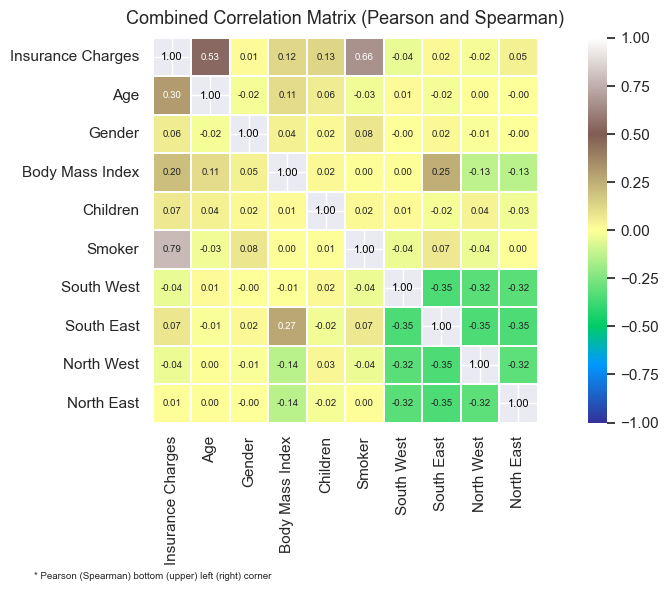

In [128]:
data_corr = data_temp.rename(columns={
        'age': 'Age',
        'bmi': 'Body Mass Index',
        'charges': 'Insurance Charges',
        'children': 'Children',
        'smoker': 'Smoker',
        'sex': 'Gender',
        'region_southwest': 'South West',
        'region_southeast': 'South East',
        'region_northwest': 'North West',
        'region_northeast': 'North East'
        })

# Place "Insurance Charges" as the first variable
column_order = ['Insurance Charges'] + [col for col in data_corr.columns if col != 'Insurance Charges']
data_corr = data_corr[column_order]

combined_heatmap_corr(
    data=data_corr,
    list_columns = list(data_corr.select_dtypes(include=['number']).columns),
    title='Combined Correlation Matrix (Pearson and Spearman)'
)


<div style="padding: 20px; border: 2px solid #c77220; border-radius: 5px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); max-width: 100%; margin: 0 auto;">
    <ul style="font-size: 18px; font-family: 'Arial', sans-serif; line-height: 1.5em; word-wrap: break-word; overflow-wrap: break-word;">
    <h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
        <li> The table above presents the correlation matrix, showing Pearson correlations (bottom left) and Spearman correlations (upper right). Our main variable of interest is <code>insurance charges</code>. </li>
        <li> The Pearson correlation indicates that insurance charges have a strong correlation with smoking status (those who smoke pay more, with a correlation of 0.79). However, this correlation decreases to 0.66 when using the Spearman correlation. It is important to check for normality and linearity of the relationship before determining which correlation type to use. </li>
        <li> Additionally, there is a moderate correlation between age and insurance charges (0.30 for Pearson; 0.53 for Spearman). </li>
        <li> All other factors show weak correlations with insurance charges. </li>
    </ul>
</div>


---

<a id="chapter5"></a>
## <div style="text-align:center; border-radius:30px 30px; padding:7px; color:white; margin:0; font-size:90%; font-family:Pacifico; background-color:#3170af; overflow:hidden"><b> 📈 Graphical + Statistical Analyses </b></div>

<a id="chapter5a"></a>
#### <div style="text-align:center; border-radius:30px 30px; padding:7px; color:black; margin:0; font-size:90%; font-family:Pacifico; background-color:#d0e4f9; overflow:hidden"><b> Insurance Charges </b></div>

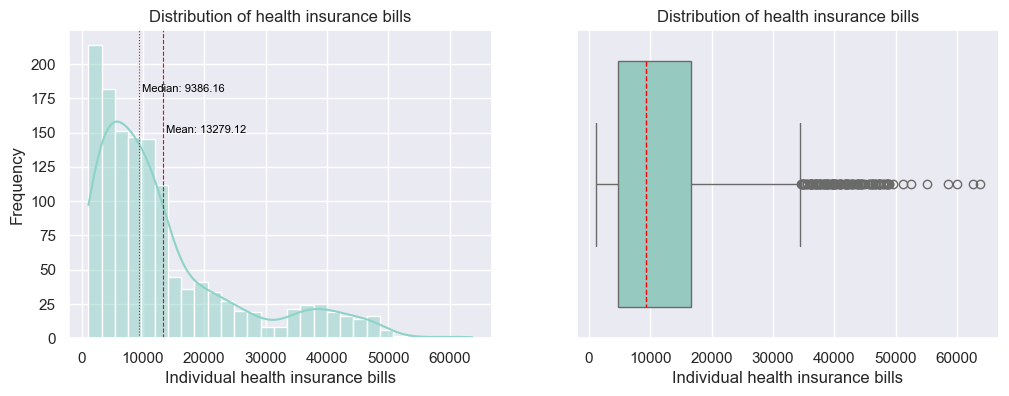

In [129]:
fig, axes = plt.subplots(1, 2, figsize = (12, 4))

sns.histplot(data_temp['charges'], kde=True, ax=axes[0])
axes[0].set(xlabel='Individual health insurance bills', ylabel='Frequency')
axes[0].set_title('Distribution of health insurance bills')
axes[0].axvline(data_temp['charges'].mean(), color='red', linestyle='--', linewidth=0.8)
mean_value = data_temp['charges'].mean()  # Calculate the mean
axes[0].annotate(f'Mean: {mean_value:.2f}', 
                 xy=(data_temp['charges'].mean(), 0),
                 xytext=(data_temp['charges'].mean() + 500, 150),
                 fontsize=8, color='black')
axes[0].axvline(data_temp['charges'].median(), color='red', linestyle=':', linewidth=0.8)
median_value = data_temp['charges'].median()  # Calculate the median
axes[0].annotate(f'Median: {median_value:.2f}',
                 xy=(data_temp['charges'].median(), 0),
                 xytext=(data_temp['charges'].median() + 500, 180),
                 fontsize=8, color='black')

sns.boxplot(data_temp['charges'], ax=axes[1], orient='h', medianprops={"color": "red", "linestyle": '--'})
axes[1].set(xlabel='Individual health insurance bills')
axes[1].set_title('Distribution of health insurance bills')

plt.show();

In [130]:
data_charge = data_temp['charges'].describe().round(2).to_frame()
data_charge.columns = ['Insurance charges']
display(data_charge)

,Insurance charges
count,1337.00
mean,13279.12
std,12110.36
min,1121.87
25%,4746.34
50%,9386.16
75%,16657.72
max,63770.43


<div style="padding: 20px; border: 2px solid #c77220; border-radius: 5px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); max-width: 100%; margin: 0 auto;">
    <ul style="font-size: 18px; font-family: 'Arial', sans-serif; line-height: 1.5em; word-wrap: break-word; overflow-wrap: break-word;">
    <h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
        <li> Individual health insurance bills are right-skewed, with a median value of 9,386.16 and a mean value of 13,279.12 (The data is not normally distributed). </li>
        <li>The boxplot indicates the presence of some outliers.</li>
        <li> Let's see some descriptive statistics: </li>
    </ul>
</div>

---

<a id="chapter5b"></a>
#### <div style="text-align:center; border-radius:30px 30px; padding:7px; color:black; margin:0; font-size:90%; font-family:Pacifico; background-color:#d0e4f9; overflow:hidden"><b> 🔍 Insurance bills conditional on an individuals' gender  </b></div>

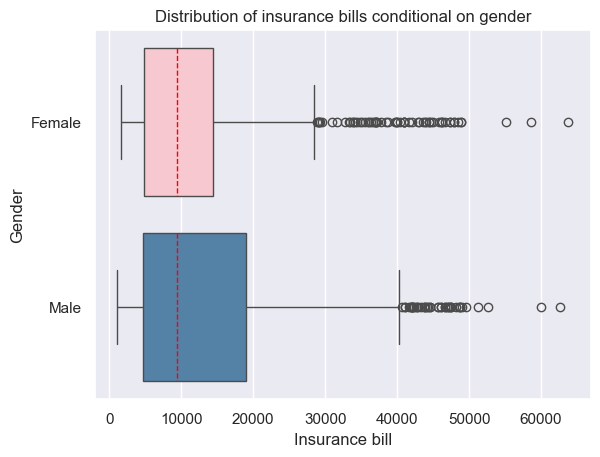

In [131]:
ax = sns.boxplot(data_temp, x ='charges', y='sex', orient='h', 
                 hue = 'sex', palette={1: 'steelblue', 0: 'pink'}, 
                 medianprops={"color": "red", "linestyle": '--'}
                 )
ax.set_yticks([0, 1])  # Fix the tick positions (0 for 'female', 1 for 'male')
ax.set_yticklabels(['Female', 'Male'])
ax.set_title('Distribution of insurance bills conditional on gender')
ax.set(xlabel = 'Insurance bill', ylabel = 'Gender')
if ax.legend_ is not None:
    ax.legend_.remove()
plt.show();


In [132]:
data_group_sex = data_temp.groupby('sex')['charges'].describe().round(2)
data_group_sex = data_group_sex.rename(index={1: 'Male', 0: 'Female'})
display(data_group_sex)

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,662.0,12569.58,11128.70,1607.51,4885.16,9412.96,14454.69,63770.43
Male,675.0,13975.00,12971.96,1121.87,4654.02,9377.90,19006.69,62592.87


<div style="padding: 20px; border: 2px solid #c77220; border-radius: 5px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); max-width: 100%; margin: 0 auto;">
    <ul style="font-size: 18px; font-family: 'Arial', sans-serif; line-height: 1.5em; word-wrap: break-word; overflow-wrap: break-word;">
    <h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
        <li>  <strong>Graphical Analysis:</strong> Based on the visual representation, we cannot definitively conclude whether there is a significant difference in insurance bills (median) between males and females. </li>
        <li><strong>Notable Observations:</strong> Males exhibit a higher interquartile range (IQR) of insurance bills and a higher fourth quartile. These observations may provide an initial expectation of a potential statistically significant difference between male and female insurance bills.</li>
        <li> The average value of males' insurance bills is higher than that of females. Additionally, both distributions are right-skewed.</li>
        <li> <strong>Important:</strong> The maximum value of female insurance bills is higher than that of males, potentially indicating the presence of more significant outliers in the female group.</li>
        <li> Let's see some descriptive statistics: </li>
    </ul>
</div>

---

<h4 style="margin-bottom: 0;">📊 Statistical Test:</h4>

**Hypothesis to be tested**

*There is statistically significant difference in insurance bills between males ($μ_1$) and females ($μ_2$):*

$$ H_0 : μ_1 <= μ_2$$
$$ H_1 : μ_1 > μ_2$$

**Points to consider:**

- There are ``two`` groups that are ``independent`` and the data is ``continuous``. So, we can use either ``two-sample independent t-test`` or ``Mann-Whitney U Test``. To choose one of them, we need to check whether the data is normally distributed. If it is normally distributed, we should select a ``two-sample independent t-test``, otherwise we should use a non-parametric statistical test - ``Mann-Whitney U Test``. I am going to test whether the data is normally distributed using ``Shapiro-Wilk test for normality.``

In [133]:
# Test whether the data is normally distributed. 
male_bill = data_temp.loc[data_temp['sex'] == 1, 'charges']
female_bill = data_temp.loc[data_temp['sex'] == 0, 'charges']

print('Normality test for males:')
_, pval_norm = stats.shapiro(male_bill)
print(normality_test(pval_norm))

print('Normality test for females:')
_, pval_norm = stats.shapiro(female_bill)
print(normality_test(pval_norm))

Normality test for males:
The p-value (0.00) is less than the specified significance level 0.05. We reject H0 - the data is not normally distributed.
Normality test for females:
The p-value (0.00) is less than the specified significance level 0.05. We reject H0 - the data is not normally distributed.


<div style="padding: 20px; border: 2px solid #c77220; border-radius: 5px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); max-width: 100%; margin: 0 auto;">
    <ul style="font-size: 18px; font-family: 'Arial', sans-serif; line-height: 1.5em; word-wrap: break-word; overflow-wrap: break-word;">
    <h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
        <li>  In both cases the data is not normally distributed so we should use a non-parametric statistical test - Mann-Whitney U Test </li>
    </ul>
</div>

In [134]:
_, pval = stats.mannwhitneyu(male_bill, female_bill, alternative='greater')
print(hypothesis_test(pval))

The p-value (0.35) is greater than the specified significance level 0.05. We fail to reject H0.


<div style="padding: 20px; border: 2px solid #c77220; border-radius: 5px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); max-width: 100%; margin: 0 auto;">
    <ul style="font-size: 18px; font-family: 'Arial', sans-serif; line-height: 1.5em; word-wrap: break-word; overflow-wrap: break-word;">
    <h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
        <li>  There is <b><u>no</u></b> basis to claim that the amount of insurance bills for male clients is higher than for female clients.  </li>
    </ul>
</div>

<a id="chapter5c"></a>
#### <div style="text-align:center; border-radius:30px 30px; padding:7px; color:black; margin:0; font-size:90%; font-family:Pacifico; background-color:#d0e4f9; overflow:hidden"><b> 🔍 Insurance bills conditional on whether an individuals is smoking or not  </b></div>

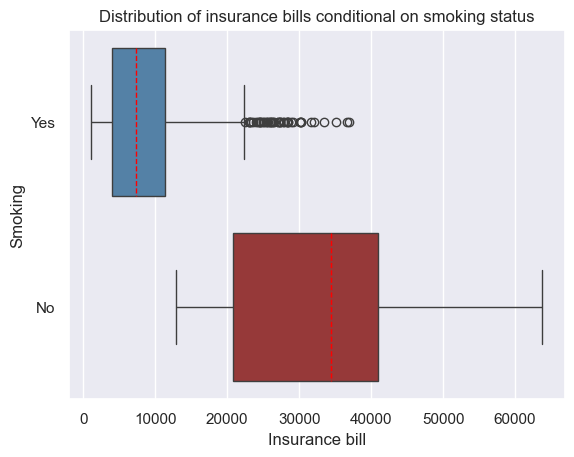

In [135]:
ax = sns.boxplot(data_temp, x = 'charges', y='smoker', orient='h', 
                 hue = 'smoker', palette={1: 'brown', 0: 'steelblue'}, 
                 medianprops={"color": "red", "linestyle": '--'}
                 )
ax.set_yticks([0, 1]) 
ax.set_yticklabels(['Yes', 'No'])
ax.set_title('Distribution of insurance bills conditional on smoking status')
ax.set(xlabel = 'Insurance bill', ylabel = 'Smoking')
if ax.legend_ is not None:
    ax.legend_.remove()
plt.show();


In [136]:
data_group_smoker = data_temp.groupby('smoker')['charges'].describe().round(2)
data_group_smoker = data_group_smoker.rename(index={1: 'Yes', 0: 'No'})
display(data_group_smoker)

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
No,1063.0,8440.66,5992.97,1121.87,3988.88,7345.73,11363.02,36910.61
Yes,274.0,32050.23,11541.55,12829.46,20826.24,34456.35,41019.21,63770.43


<div style="padding: 20px; border: 2px solid #c77220; border-radius: 5px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); max-width: 100%; margin: 0 auto;">
    <ul style="font-size: 18px; font-family: 'Arial', sans-serif; line-height: 1.5em; word-wrap: break-word; overflow-wrap: break-word;">
    <h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
        <li>  Graphical representation clearly indicates that smokers have higher median value of health insurance bills compared to non-smokers. Additionally, there are no outliers in case of smokers. </li>
        <li> In case of non-smokers, we can observe that there are some outliers in the data.   </li>       
        <li>  The average value of smokers' insurance bills is approximately four times higher than that of non-smokers.  </li>
        <li>  The distribution of insurance bills for non-smokers is right-skewed, whereas for smokers, it is left-skewed.  </li>
        <li>  <strong>Important point to consider:</strong> The number of observations attributable to smokers is four times lower than that of non-smokers.  </li>
</div>

<h4 style="margin-bottom: 0;">📊 Statistical Test:</h4>

**Hypothesis to be tested**

*There is statistically significant difference in insurance bills between smokers ($μ_1$) and fnonsmokers ($μ_2$):*

$$ H_0 : μ_1 <= μ_2$$
$$ H_1 : μ_1 > μ_2$$

**Points to consider:**

- There are ``two`` groups that are ``independent`` and the data is ``continuous``. So, we can use either ``two-sample independent t-test`` or ``Mann-Whitney U Test``. To choose one of them, we need to check whether the data is normally distributed. If it is normally distributed, we should select a ``two-sample independent t-test``, otherwise we should use a non-parametric statistical test - ``Mann-Whitney U Test``. I am going to test whether the data is normally distributed using ``Shapiro-Wilk test for normality.``

In [137]:
# Test whether the data is normally distributed. 
smoker_bill = data_temp.loc[data_temp['smoker'] == 1, 'charges']
nonsmoker_bill = data_temp.loc[data_temp['smoker'] == 0, 'charges']

print('Normality test for smokers:')
_, pval_norm = stats.shapiro(smoker_bill)
print(normality_test(pval_norm))

print('Normality test for nonsmokers:')
_, pval_norm = stats.shapiro(nonsmoker_bill)
print(normality_test(pval_norm))

Normality test for smokers:
The p-value (0.00) is less than the specified significance level 0.05. We reject H0 - the data is not normally distributed.
Normality test for nonsmokers:
The p-value (0.00) is less than the specified significance level 0.05. We reject H0 - the data is not normally distributed.


<div style="padding: 20px; border: 2px solid #c77220; border-radius: 5px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); max-width: 100%; margin: 0 auto;">
    <ul style="font-size: 18px; font-family: 'Arial', sans-serif; line-height: 1.5em; word-wrap: break-word; overflow-wrap: break-word;">
    <h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
        <li>  In both cases the data is not normally distributed so we should use a non-parametric statistical test - Mann-Whitney U Test </li>
    </ul>
</div>

In [138]:
_, pval = stats.mannwhitneyu(smoker_bill, nonsmoker_bill, alternative='greater')
print(hypothesis_test(pval))

The p-value (0.00) is less than the specified significance level 0.05. We reject H0.


<div style="padding: 20px; border: 2px solid #c77220; border-radius: 5px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); max-width: 100%; margin: 0 auto;">
    <ul style="font-size: 18px; font-family: 'Arial', sans-serif; line-height: 1.5em; word-wrap: break-word; overflow-wrap: break-word;">
    <h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
        <li> The amount of insurance bills for nonsmokers is statistically significant and lower compared to those who smoke.   </li>
    </ul>
</div>

<a id="chapter5d"></a>
#### <div style="text-align:center; border-radius:30px 30px; padding:7px; color:black; margin:0; font-size:90%; font-family:Pacifico; background-color:#d0e4f9; overflow:hidden"><b> 🔍 Insurance bills conditional on the region </b></div>

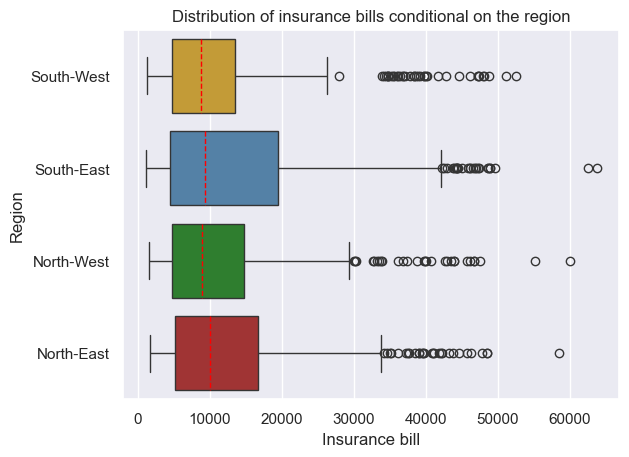

In [139]:
ax = sns.boxplot(data_temp, x = 'charges', y='region', orient='h', 
                 hue = 'region', palette={'southwest': 'goldenrod', 'southeast': 'steelblue', 'northwest': 'forestgreen', 'northeast': 'firebrick'}, 
                 medianprops={"color": "red", "linestyle": '--'}
                 )
ax.set_yticks([0, 1, 2, 3]) 
ax.set_yticklabels(['South-West', 'South-East', 'North-West', 'North-East'])
ax.set_title('Distribution of insurance bills conditional on the region')
ax.set(xlabel = 'Insurance bill', ylabel = 'Region')
if ax.legend_ is not None:
    ax.legend_.remove()
plt.show();

In [140]:
data_group_region = data_temp.groupby('region')['charges'].describe().round(2)
display(data_group_region)

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
northeast,324.0,13406.38,11255.80,1694.80,5194.32,10057.65,16687.36,58571.07
northwest,324.0,12450.84,11073.13,1621.34,4733.64,8976.98,14788.75,60021.40
southeast,364.0,14735.41,13971.10,1121.87,4440.89,9294.13,19526.29,63770.43
southwest,325.0,12346.94,11557.18,1241.56,4751.07,8798.59,13462.52,52590.83


<div style="padding: 20px; border: 2px solid #c77220; border-radius: 5px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); max-width: 100%; margin: 0 auto;">
    <ul style="font-size: 18px; font-family: 'Arial', sans-serif; line-height: 1.5em; word-wrap: break-word; overflow-wrap: break-word;">
    <h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
        <li>  The graphical representation does not reveal any significant differences in insurance bills across regions, except for some minor variations. </li>
        <li>  Of note, the South-East region has the highest interquartile range (IQR), while the South-West region has the lowest. </li>       
        <li>  There is no significant difference in the mean values of insurance bills across regions. The highest mean value is observed in the South-East region, while the lowest is in the North-West.  </li>
        <li>  The distributions of insurance bills across regions are right-skewed. </li>
        <li>  <strong>Important point to consider:</strong> The number of observations within the regions is approximately equal. </li>
</div>

<h4 style="margin-bottom: 0;">📊 Statistical Test:</h4>

**Hypothesis to be tested**

*There is statistically significant difference in insurance bills across different regions: Northeast ($μ_1$), Southeast ($μ_2$), Southwest ($μ_3$), Northwest ($μ_4$):*

$$ H_0 : μ_1 = μ_2 = μ_3 = μ_4$$
$$ H_1 : μ_1 \neq μ_2 \neq μ_3 \neq μ_4$$

**Points to consider:**

- There are ``four`` groups that are ``independent`` and the data is ``continuous``. So, we can use either ``one-way ANOVA`` or ``Kruskal-Wallis H Test``, which is a non-parametric alternative to the one-way ANOVA. To choose one of them, we need to check whether the data is normally distributed. If it is normally distributed, we should select a ``one-way ANOVA``, otherwise we should use a non-parametric statistical test - ``Kruskal-Wallis H Test``. I am going to test whether the data is normally distributed using ``Shapiro-Wilk test for normality.``

In [141]:
northeast_bill = data_temp.loc[data_temp['region']=='northeast', 'charges']
northwest_bill = data_temp.loc[data_temp['region']=='northwest', 'charges']
southeast_bill = data_temp.loc[data_temp['region']=='southeast', 'charges']
southwest_bill = data_temp.loc[data_temp['region']=='southwest', 'charges']

# Tests of normality
print('Normality - North East region:')
_, pval = stats.shapiro(northeast_bill)
print(normality_test(pval))

print('Normality - North West region:')
_, pval = stats.shapiro(northwest_bill)
print(normality_test(pval))

print('Normality - South East region:')
_, pval = stats.shapiro(southeast_bill)
print(normality_test(pval))

print('Normality - South West region:')
_, pval = stats.shapiro(southwest_bill)
print(normality_test(pval))

Normality - North East region:
The p-value (0.00) is less than the specified significance level 0.05. We reject H0 - the data is not normally distributed.
Normality - North West region:
The p-value (0.00) is less than the specified significance level 0.05. We reject H0 - the data is not normally distributed.
Normality - South East region:
The p-value (0.00) is less than the specified significance level 0.05. We reject H0 - the data is not normally distributed.
Normality - South West region:
The p-value (0.00) is less than the specified significance level 0.05. We reject H0 - the data is not normally distributed.


<div style="padding: 20px; border: 2px solid #c77220; border-radius: 5px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); max-width: 100%; margin: 0 auto;">
    <ul style="font-size: 18px; font-family: 'Arial', sans-serif; line-height: 1.5em; word-wrap: break-word; overflow-wrap: break-word;">
    <h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
        <li> In all cases the data is not normally distributed so we should use a non-parametric statistical test - Kruskal-Wallis H Test</li>
    </ul>
</div>

In [142]:
_, pval = stats.kruskal(northeast_bill, northwest_bill, southeast_bill, southwest_bill)
print(hypothesis_test(pval))

The p-value (0.20) is greater than the specified significance level 0.05. We fail to reject H0.


<div style="padding: 20px; border: 2px solid #c77220; border-radius: 5px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); max-width: 100%; margin: 0 auto;">
    <ul style="font-size: 18px; font-family: 'Arial', sans-serif; line-height: 1.5em; word-wrap: break-word; overflow-wrap: break-word;">
    <h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
        <li>  We fail to reject H0: There are no statistically significant differences in insurance bills across regions. </li>
    </ul>
</div>

<a id="chapter5e"></a>
#### <div style="text-align:center; border-radius:30px 30px; padding:7px; color:black; margin:0; font-size:90%; font-family:Pacifico; background-color:#d0e4f9; overflow:hidden"><b> 🔍 Insurance bills conditional on age group </b></div>

In [143]:
# Generate new variable that splits the age into subgroups
"""
    18–27: Young Adults (below 25th percentile)
    28–39: Early Middle Age (25th to 50th percentile)
    40–51: Late Middle Age (50th to 75th percentile)
    52–64: Seniors (above 75th percentile)
"""
# right = False - ensures that the intervals are as follows [a, b)    
data_temp['AgeBins'] = pd.cut(data_temp['age'], 
                         bins=[18, 28, 40, 52, 65], 
                         labels=['YoungAdult', 'EarlyMiddleAge', 'LateMiddleAge', 'Seniors'], 
                         right = False)    

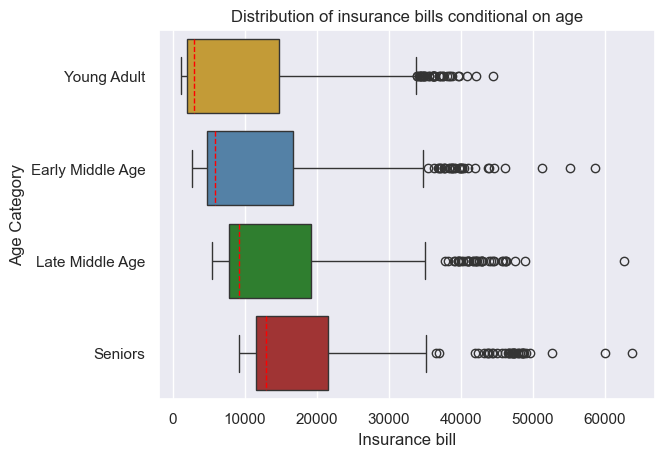

In [144]:
ax = sns.boxplot(data_temp, x = 'charges', y='AgeBins', orient='h', 
                 hue = 'AgeBins', palette={'YoungAdult': 'goldenrod', 'EarlyMiddleAge': 'steelblue', 'LateMiddleAge': 'forestgreen', 'Seniors': 'firebrick'}, 
                 medianprops={"color": "red", "linestyle": '--'}
                 )
ax.set_yticks([0, 1, 2, 3])  
ax.set_yticklabels(['Young Adult', 'Early Middle Age', 'Late Middle Age', 'Seniors'])
ax.set_title('Distribution of insurance bills conditional on age')
ax.set(xlabel = 'Insurance bill', ylabel = 'Age Category')
if ax.legend_ is not None:
    ax.legend_.remove()
plt.show();

In [145]:
data_group_age = data_temp.groupby('AgeBins', observed=False)['charges'].describe().round(2)
display(data_group_age)

,count,mean,std,min,25%,50%,75%,max
AgeBins,,,,,,,,
YoungAdult,361.0,9118.85,11558.22,1121.87,1986.93,2897.32,14711.74,44501.40
EarlyMiddleAge,312.0,11385.96,11659.54,2689.50,4662.40,5796.97,16687.36,58571.07
LateMiddleAge,337.0,14618.37,11651.65,5415.66,7740.34,9095.07,19144.58,62592.87
Seniors,327.0,18298.07,11583.67,9140.95,11523.64,12979.36,21496.41,63770.43


<div style="padding: 20px; border: 2px solid #c77220; border-radius: 5px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); max-width: 100%; margin: 0 auto;">
    <ul style="font-size: 18px; font-family: 'Arial', sans-serif; line-height: 1.5em; word-wrap: break-word; overflow-wrap: break-word;">
    <h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
        <li>  The graphical representation indicates a clear trend of increasing health insurance bills with age </li>
        <li>  With age, the mean value of health-related insurance bills increases. </li>       
        <li>  The distributions of insurance bills across age groups are right-skewed.  </li>
        <li>  <strong>Important point to consider:</strong> The number of observations within the age group is approximately equal. </li>
</div>

<h4 style="margin-bottom: 0;">📊 Statistical Test:</h4>

**Hypothesis to be tested**

*There is statistically significant difference in insurance bills across different age groups: Young Adult ($μ_1$), Early Middle Age ($μ_2$), Late Middle Age ($μ_3$), Seniors ($μ_4$):*

$$ H_0 : μ_1 = μ_2 = μ_3 = μ_4$$
$$ H_1 : μ_1 \neq μ_2 \neq μ_3 \neq μ_4$$

**Points to consider:**

- There are ``four`` groups that are ``independent`` and the data is ``continuous``. So, we can use either ``one-way ANOVA`` or ``Kruskal-Wallis H Test``, which is a non-parametric alternative to the one-way ANOVA. To choose one of them, we need to check whether the data is normally distributed. If it is normally distributed, we should select a ``one-way ANOVA``, otherwise we should use a non-parametric statistical test - ``Kruskal-Wallis H Test``. I am going to test whether the data is normally distributed using ``Shapiro-Wilk test for normality.``

In [146]:
young_bill = data_temp.loc[data_temp['AgeBins']=='YoungAdult', 'charges']
earlymiddle_bill = data_temp.loc[data_temp['AgeBins']=='EarlyMiddleAge', 'charges']
latemiddle_bill = data_temp.loc[data_temp['AgeBins']=='LateMiddleAge', 'charges']
senior_bill = data_temp.loc[data_temp['AgeBins']=='Seniors', 'charges']

# Tests of normality
print('Normality - Young Adults:')
_, pval = stats.shapiro(young_bill)
print(normality_test(pval))

print('Normality - Early Middle Age:')
_, pval = stats.shapiro(earlymiddle_bill)
print(normality_test(pval))

print('Normality - Late Middle Age:')
_, pval = stats.shapiro(latemiddle_bill)
print(normality_test(pval))

print('Normality - Seniors:')
_, pval = stats.shapiro(senior_bill)
print(normality_test(pval))

Normality - Young Adults:
The p-value (0.00) is less than the specified significance level 0.05. We reject H0 - the data is not normally distributed.
Normality - Early Middle Age:
The p-value (0.00) is less than the specified significance level 0.05. We reject H0 - the data is not normally distributed.
Normality - Late Middle Age:
The p-value (0.00) is less than the specified significance level 0.05. We reject H0 - the data is not normally distributed.
Normality - Seniors:
The p-value (0.00) is less than the specified significance level 0.05. We reject H0 - the data is not normally distributed.


<div style="padding: 20px; border: 2px solid #c77220; border-radius: 5px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); max-width: 100%; margin: 0 auto;">
    <ul style="font-size: 18px; font-family: 'Arial', sans-serif; line-height: 1.5em; word-wrap: break-word; overflow-wrap: break-word;">
    <h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
        <li> In all cases the data is not normally distributed so we should use a non-parametric statistical test - Kruskal-Wallis H Test</li>
    </ul>
</div>

In [147]:
_, pval = stats.kruskal(young_bill, earlymiddle_bill, latemiddle_bill, senior_bill)
print(hypothesis_test(pval))

The p-value (0.00) is less than the specified significance level 0.05. We reject H0.


<div style="padding: 20px; border: 2px solid #c77220; border-radius: 5px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); max-width: 100%; margin: 0 auto;">
    <ul style="font-size: 18px; font-family: 'Arial', sans-serif; line-height: 1.5em; word-wrap: break-word; overflow-wrap: break-word;">
    <h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
        <li> We find evidence to reject H0: There are statistically significant differences in insurance bills across age groups! </li>
    </ul>
</div>

<a id="chapter5f"></a>
## <div style="text-align:center; border-radius:30px 30px; padding:7px; color:red; margin:0; font-size:90%; font-family:Pacifico; background-color:#d0e4f9; overflow:hidden"><b>         🚨 Conclusions of EDA </b></div>

<div style="padding: 20px; border: 2px solid #c77220; border-radius: 5px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); max-width: 100%; margin: 0 auto;">
    <ul style="font-size: 18px; font-family: 'Arial', sans-serif; line-height: 1.5em; word-wrap: break-word; overflow-wrap: break-word;">
    <h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
        <li> There is no evidence to suggest that there is a difference in the amount of insurance bills paid by male vs female clients. </li>
        <li> The amount of insurance bills for non-smoking clients is lower than for smoking clients. </li>
        <li> There is no evidence to suggest that there is a difference in the amount of insurance bills across different regions. </li>
        <li> There is evidence to suggest that there is a difference in the amount of insurance bills across different age groups. </li>
    </ul>
</div>

<a id="chapter6"></a>
## <div style="text-align:center; border-radius:30px 30px; padding:7px; color:white; margin:0; font-size:90%; font-family:Pacifico; background-color:#3170af; overflow:hidden"><b> 🛠️ Modeling </b></div>

In [148]:
# Drop variables that won't be used 
data_temp = data_temp.drop(['region', 'AgeBins'], axis=1)
data_temp.head(2)

,age,sex,bmi,children,smoker,charges,region_southwest,region_southeast,region_northwest,region_northeast
0,19,0,27.90,0,1,16884.9240,1,0,0,0
1,18,1,33.77,1,0,1725.5523,0,1,0,0


+ Let's analyze the each variable separately and in relation to the insurance charge:

In [149]:
data_corr = data_temp.rename(columns={
        'age': 'Age',
        'bmi': 'Body Mass Index',
        'charges': 'Insurance Charges',
        'children': 'Children',
        'smoker': 'Smoker',
        'sex': 'Gender',
        'region_southwest': 'South West',
        'region_southeast': 'South East',
        'region_northwest': 'North West',
        'region_northeast': 'North East'
        })

features_col = [col for col in data_corr.columns if col!='Insurance Charges']
features_col

['Age',
 'Gender',
 'Body Mass Index',
 'Children',
 'Smoker',
 'South West',
 'South East',
 'North West',
 'North East']

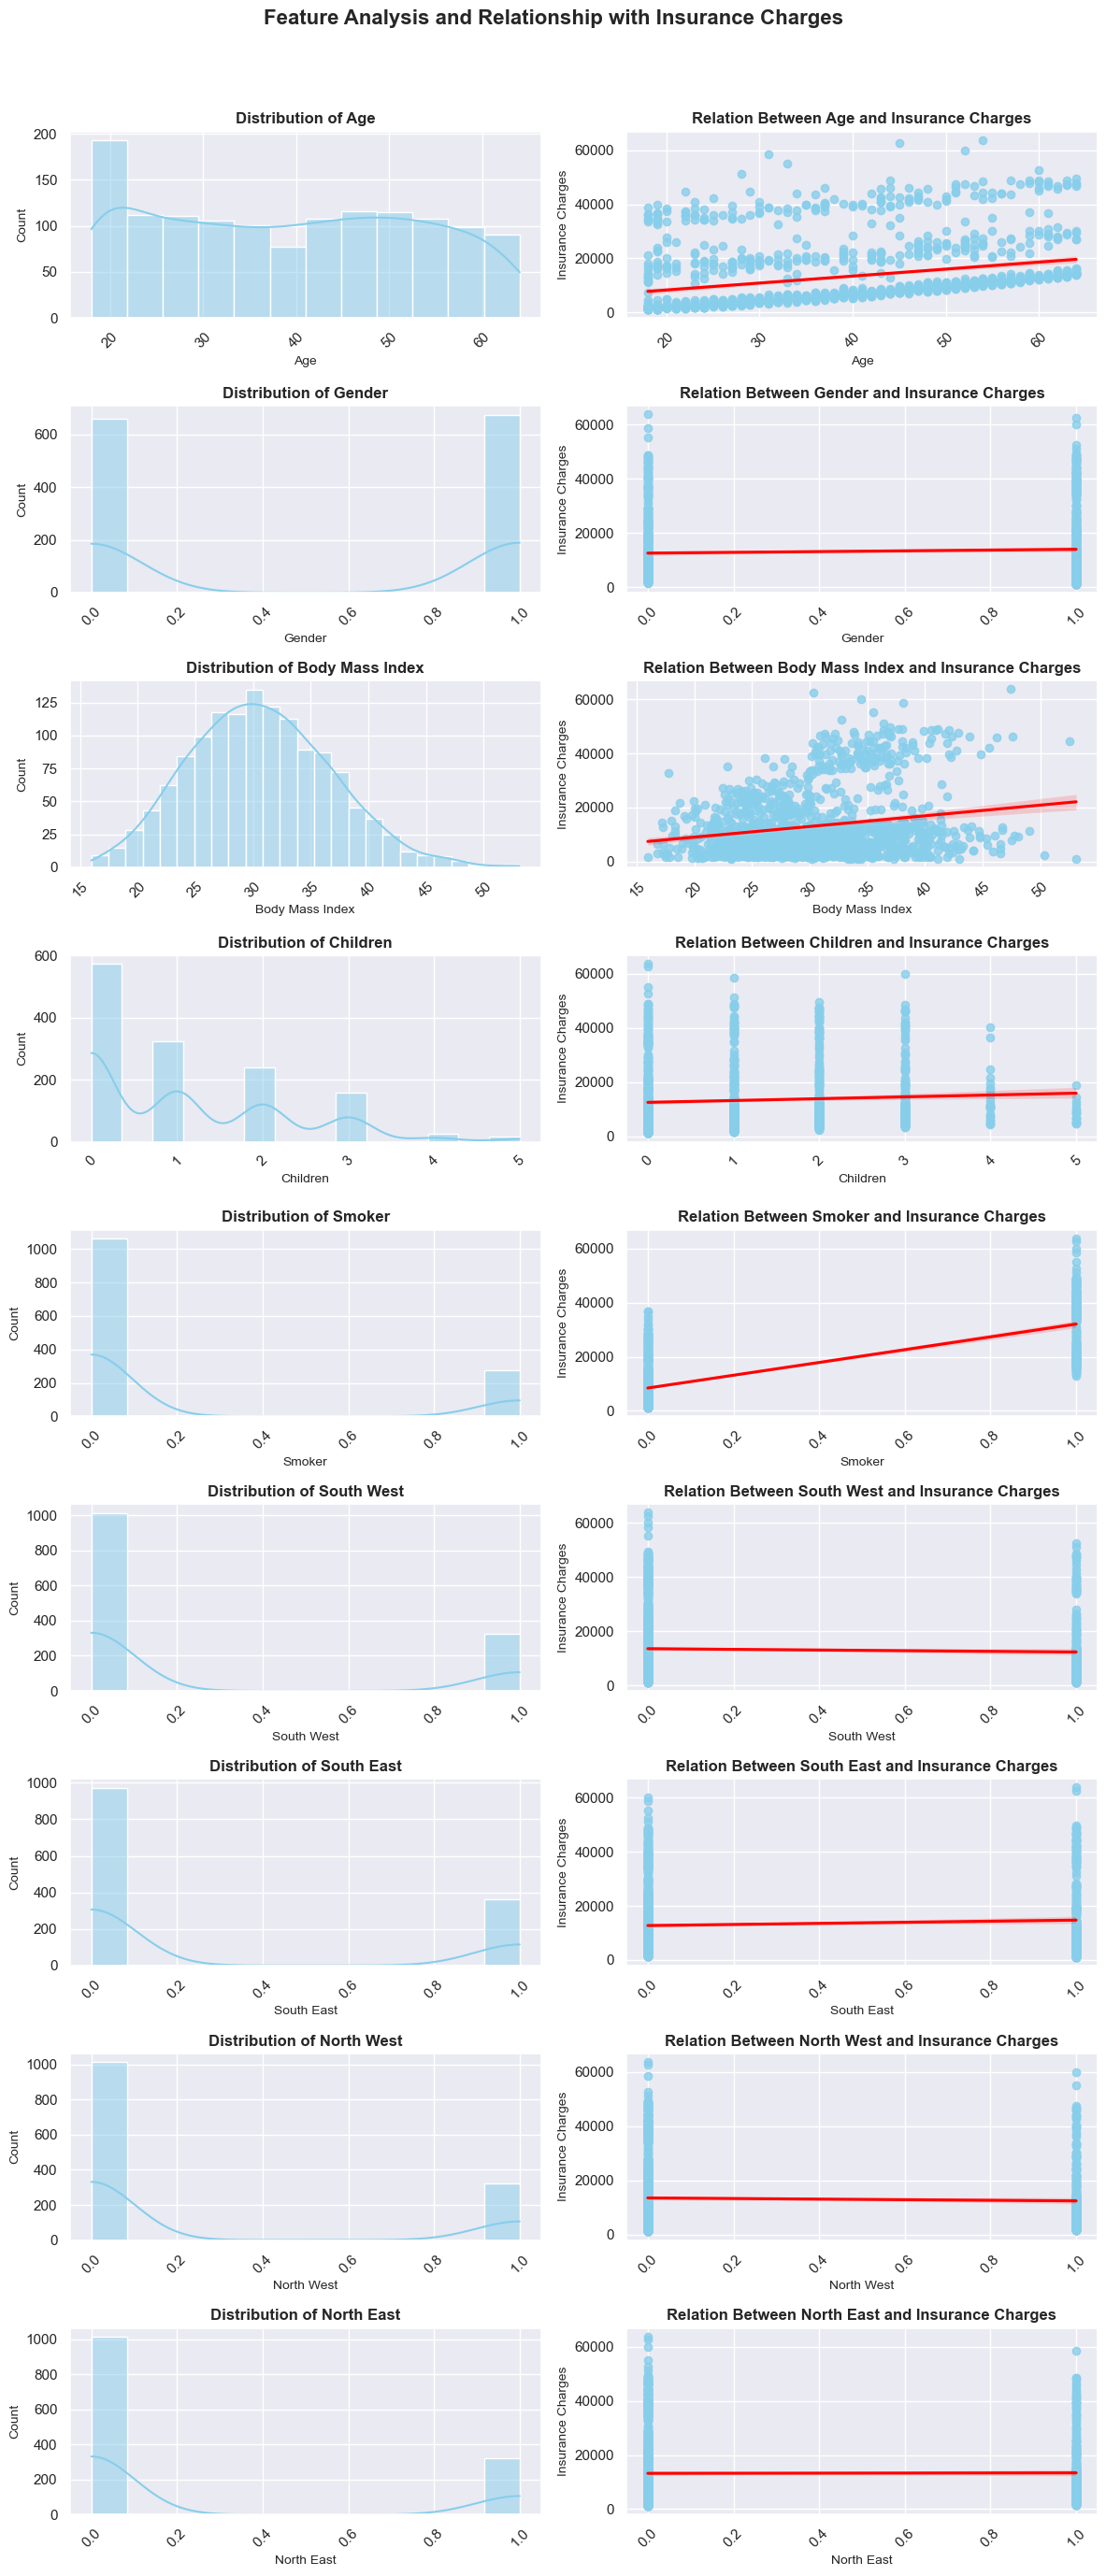

In [150]:
n = len(features_col)
fig, axes = plt.subplots(n, 2, figsize=(12, n * 3))  # Dynamically scale height based on number of features

for ind, feature in enumerate(features_col):
    # Histogram with KDE
    hist = sns.histplot(data=data_corr, x=feature, kde=True, ax=axes[ind][0], color='skyblue')
    hist.set_title(f'Distribution of {feature}', fontsize=12, fontweight='bold')
    hist.set_xlabel(f'{feature}', fontsize=10)
    hist.set_ylabel('Count', fontsize=10)
    hist.xaxis.set_tick_params(rotation=45)
    # Regression Plot
    regplot = sns.regplot(
        data=data_corr, x=feature, y='Insurance Charges', ax=axes[ind][1],
        scatter_kws={'color': 'skyblue'}, line_kws={'color': 'red'}
    )
    regplot.set_title(f'Relation Between {feature} and Insurance Charges', fontsize=12, fontweight='bold')
    regplot.set_xlabel(f'{feature}', fontsize=10)
    regplot.set_ylabel('Insurance Charges', fontsize=10)
    regplot.xaxis.set_tick_params(rotation=45)

# Add a main title
fig.suptitle('Feature Analysis and Relationship with Insurance Charges', fontsize=16, fontweight='bold', y=1.02)
# Adjust layout and save
plt.tight_layout()
#plt.savefig('feature_analysis_insurance_charges_with_kde.png', dpi=300, bbox_inches='tight')
plt.show();

<div style="padding: 20px; border: 2px solid #c77220; border-radius: 5px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); max-width: 100%; margin: 0 auto;">
    <ul style="font-size: 18px; font-family: 'Arial', sans-serif; line-height: 1.5em; word-wrap: break-word; overflow-wrap: break-word;">
    <h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
        <li> As before, we observe that there is some positive correlation between Age, Body Mass, Smoking Status and Insurance Charges. </li>
        <li> Potentially, there is a non-linear relation between body-mass and insurance charge. </li>
    </ul>
</div>

In [151]:
X = data_temp.drop('charges', axis=1)
y = data_temp['charges']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2,
    random_state = 42
)

print(f'Train shape: {X_train.shape}')
print(f'Test shape: {X_test.shape}')

Train shape: (1069, 9)
Test shape: (268, 9)


+ Define function for the output of models' metrics

In [152]:
def print_metrics(y_train, y_train_predict, y_test, y_test_predict):
    print(f'Train R^2: {metrics.r2_score(y_train, y_train_predict):.3f}')
    print(f'Train MAE: {metrics.mean_absolute_error(y_train, y_train_predict):.3f}')
    print(f'Train MAPE: {metrics.mean_absolute_percentage_error(y_train, y_train_predict)*100:.3f}')
    print('\n')
    print(f'Test R^2: {metrics.r2_score(y_test, y_test_predict):.3f}')
    print(f'Test MAE: {metrics.mean_absolute_error(y_test, y_test_predict):.3f}')
    print(f'Train MAPE: {metrics.mean_absolute_percentage_error(y_test, y_test_predict)*100:.3f}')

<a id="chapter6a"></a>
#### <div style="text-align:center; border-radius:30px 30px; padding:7px; color:black; margin:0; font-size:90%; font-family:Pacifico; background-color:#d0e4f9; overflow:hidden"><b> 🔍 First Iteration - Model 1 </b></div>

+ **Linear model**
We are going to estimate the following model:
$$\widehat{y_i}= w_0+\sum_{j=0}^m w_j x_{ij}$$

The loss function($L(\omega)$) that we are going to minimize is Mean Absolute Error (MAE):
$$L(\omega) = MAE = \frac{1}{n} * \sum_{i=1}^{n}{|y_i - \widehat{y_i}|} \Rightarrow min_\omega $$

and Mean Absolure Percentage Error (MAPE):
$$L(\omega) = MAPE = \frac{100\%}{n} * \sum_{i=1}^{n}{\frac{|y_i - \widehat{y_i}|}{y_i}} \Rightarrow min_\omega $$


In [153]:
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
y_train_predict = lr.predict(X_train)
y_test_predict = lr.predict(X_test)
print_metrics(y_train, y_train_predict, y_test, y_test_predict)

Train R^2: 0.730
Train MAE: 4181.902
Train MAPE: 41.921


Test R^2: 0.807
Test MAE: 4177.046
Train MAPE: 41.397


<div style="padding: 20px; border: 2px solid #c77220; border-radius: 5px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); max-width: 100%; margin: 0 auto;">
    <ul style="font-size: 18px; font-family: 'Arial', sans-serif; line-height: 1.5em; word-wrap: break-word; overflow-wrap: break-word;">
    <h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
        <li> We observe that simple linear regression performs well in explaining the dependent variable (Insurance Charges), achieving an explanatory power of 73% in the training sample and 80.7\% in the test sample. </li>
        <li> However, the mean absolute error and mean absolute percentage error are quite high. Specifically, the model, on average, deviates from the actual predictions by 4,181.902 USD in the training sample and 4,177.046 USD in the test sample. This corresponds to 41.921% and 41.397%, respectively. </li>
    </ul>
</div>

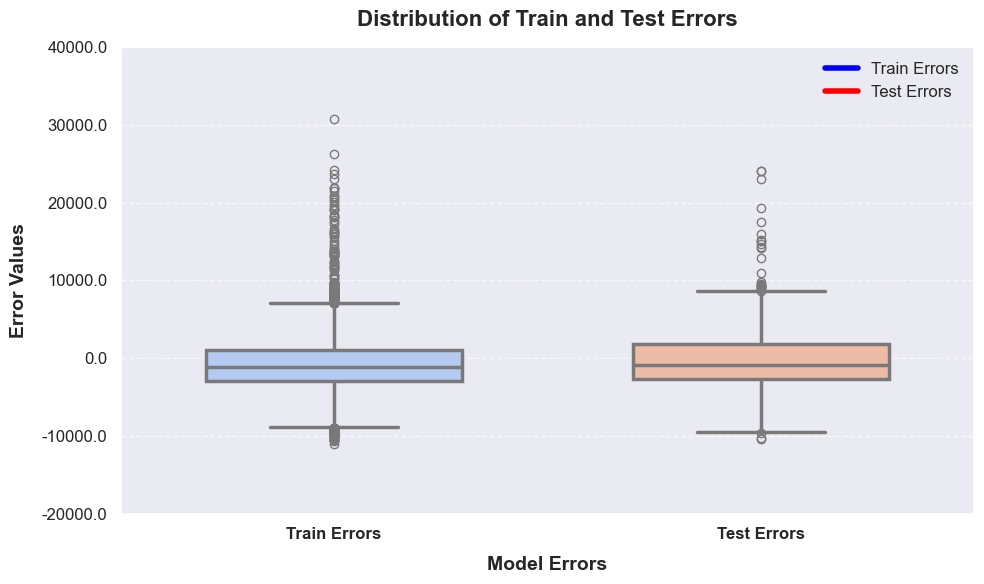

In [154]:
train_error = y_train - y_train_predict
test_error = y_test - y_test_predict

# Prepare data for the boxplot
predict_df = pd.DataFrame(
    {
        'Train Errors': train_error, 
        'Test Errors': test_error
    }
)
# Create a figure for the plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(
    data=predict_df, 
    ax=ax, 
    palette="coolwarm",  # Use a visually appealing color palette
    width=0.6,  # Adjust the width of the boxes
    linewidth=2.5  # Thicker border for better visibility
)
# Add gridlines for better readability
ax.grid(axis='y', linestyle='--', alpha=0.7)
# Customize axis labels and title
ax.set_xlabel('Model Errors', fontsize=14, fontweight='bold', labelpad=10)
ax.set_ylabel('Error Values', fontsize=14, fontweight='bold', labelpad=10)
ax.set_title('Distribution of Train and Test Errors', fontsize=16, fontweight='bold', pad=15)
# Customize tick labels
ax.set_xticks(ax.get_xticks())  # Ensure tick positions are fixed
ax.set_xticklabels(ax.get_xticks(), fontsize=12, fontweight='bold')
ax.set_yticks(ax.get_yticks())  # Ensure tick positions are fixed
ax.set_yticklabels([f"{tick:.1f}" for tick in ax.get_yticks()], fontsize=12)
# Add a legend for clarity (optional)
legend_handles = [
    plt.Line2D([0], [0], color='blue', lw=4, label='Train Errors'),
    plt.Line2D([0], [0], color='red', lw=4, label='Test Errors')
]
ax.legend(handles=legend_handles, loc='upper right', fontsize=12, frameon=False)
ax.set_xticklabels(['Train Errors', 'Test Errors'], fontsize=12, fontweight='bold')
# Display the plot
plt.tight_layout()
plt.show();

<div style="padding: 20px; border: 2px solid #c77220; border-radius: 5px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); max-width: 100%; margin: 0 auto;">
    <ul style="font-size: 18px; font-family: 'Arial', sans-serif; line-height: 1.5em; word-wrap: break-word; overflow-wrap: break-word;">
    <h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
        <li> The boxplot displaying the distribution of training and test errors reveals that the model both overestimates and underestimates insurance fees. </li>
        <li> In the case of the training sample, the errors exhibit more extreme values. </li>
    </ul>
</div>

<a id="chapter6b"></a>
#### <div style="text-align:center; border-radius:30px 30px; padding:7px; color:black; margin:0; font-size:90%; font-family:Pacifico; background-color:#d0e4f9; overflow:hidden"><b> 🔍 Second Iteration - Model 2 (Stochastic Gradient Descent (SGD)) </b></div>

+ Stochastic Gradient Descent (SGD):

$$\omega^{(k+1)} = \omega^{(k)} - \eta\nabla L(\omega^{(k)})$$

+ We need to normalize variables before applying the algorithm

In [155]:
scaler = preprocessing.MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

sgd_lr = linear_model.SGDRegressor(random_state=42)
sgd_lr.fit(X_train_scaled, y_train)
y_train_pred = sgd_lr.predict(X_train_scaled)
y_test_pred = sgd_lr.predict(X_test_scaled)
#Выводим результирующие метрики
print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: 0.730
Train MAE: 4141.928
Train MAPE: 40.435


Test R^2: 0.808
Test MAE: 4352.032
Train MAPE: 47.338


<div style="padding: 20px; border: 2px solid #c77220; border-radius: 5px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); max-width: 100%; margin: 0 auto;">
    <ul style="font-size: 18px; font-family: 'Arial', sans-serif; line-height: 1.5em; word-wrap: break-word; overflow-wrap: break-word;">
    <h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
        <li> We observe that SGD performs well in explaining the dependent variable (Insurance Charges), achieving an explanatory power of 73% in the training sample and 80.8% in the test sample. </li>
        <li> However, the mean absolute error and mean absolute percentage error are quite high as before. Specifically, the model, on average, deviates from the actual predictions by 4,141.928 USD in the training sample and 4,352.032 USD in the test sample. This corresponds to 40.435% and 47.338%, respectively. </li>
    </ul>
</div>

<a id="chapter6c"></a>
#### <div style="text-align:center; border-radius:30px 30px; padding:7px; color:black; margin:0; font-size:90%; font-family:Pacifico; background-color:#d0e4f9; overflow:hidden"><b> 🔍 Third Iteration - Model 3 (Delete Outliers and Take Log(y)) </b></div>

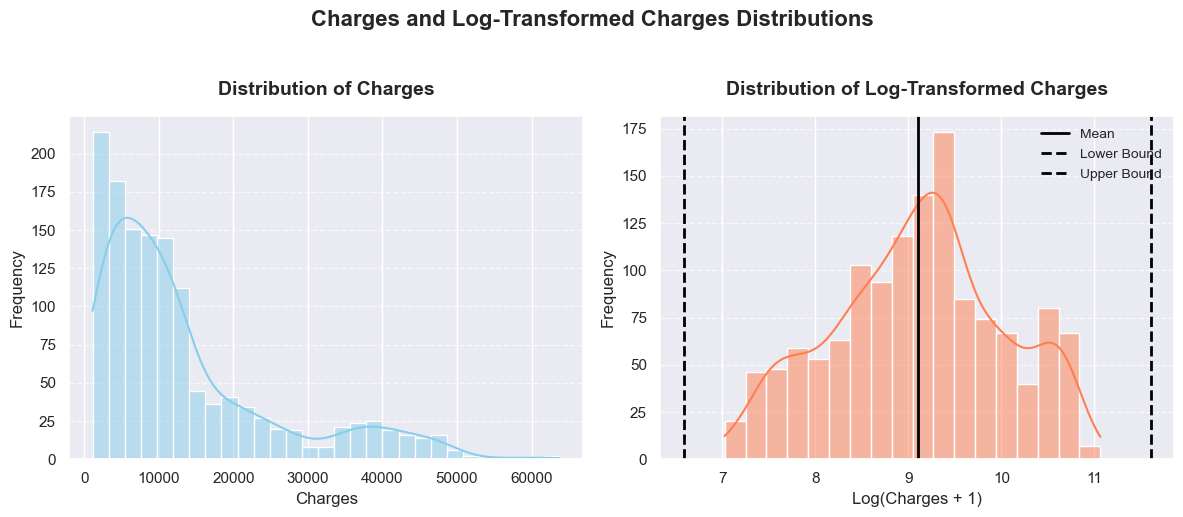

In [156]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  
# Original charges histogram
sns.histplot(
    data=data_temp, x='charges', ax=axes[0], color='skyblue', kde=True
)
axes[0].set_title('Distribution of Charges', fontsize=14, fontweight='bold', pad=15)
axes[0].set_xlabel('Charges', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Log-transformed charges histogram
log_charge = np.log(data_temp['charges'] + 1)
sns.histplot(
    data=log_charge, ax=axes[1], color='coral', kde=True
)
axes[1].set_title('Distribution of Log-Transformed Charges', fontsize=14, fontweight='bold', pad=15)
axes[1].set_xlabel('Log(Charges + 1)', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Calculate the Interquartile Range (IQR)
Q1 = log_charge.quantile(0.25)
Q3 = log_charge.quantile(0.75)
IQR = Q3 - Q1

# Add vertical lines to the log-transformed plot
axes[1].axvline(log_charge.mean(), color='black', lw=2, label='Mean')
axes[1].axvline(Q1 - 1.5 * IQR, color='black', ls='--', lw=2, label='Lower Bound')
axes[1].axvline(Q3 + 1.5 * IQR, color='black', ls='--', lw=2, label='Upper Bound')

# Add legend to the second plot
axes[1].legend(fontsize=10, loc='upper right', frameon=False)
# Add overall title for both subplots
fig.suptitle('Charges and Log-Transformed Charges Distributions', fontsize=16, fontweight='bold', y=1.03)
# Adjust layout
plt.tight_layout()
plt.show()

<div style="padding: 20px; border: 2px solid #c77220; border-radius: 5px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); max-width: 100%; margin: 0 auto;">
    <ul style="font-size: 18px; font-family: 'Arial', sans-serif; line-height: 1.5em; word-wrap: break-word; overflow-wrap: break-word;">
    <h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
        <li> It appears that there are not many outliers and applying a logarithmic transformation to the insurance charges brings the variable closer to a normal distribution. </li>
    </ul>
</div>

+ Let's drop outliers:

In [157]:
def outliers_IQR(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    IQR = Q3 - Q1        
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

outliers, temp_cleaned = outliers_IQR(data_temp, 'charges', log_scale=True)
outliers, temp_cleaned = outliers_IQR(temp_cleaned, 'bmi', log_scale=True)

print(f'Shape before cleaning outliers: {data_temp.shape}')
print(f'Shape after cleaning outliers: {temp_cleaned.shape}')

Shape before cleaning outliers: (1337, 10)
Shape after cleaning outliers: (1331, 10)


<div style="padding: 20px; border: 2px solid #c77220; border-radius: 5px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); max-width: 100%; margin: 0 auto;">
    <ul style="font-size: 18px; font-family: 'Arial', sans-serif; line-height: 1.5em; word-wrap: break-word; overflow-wrap: break-word;">
    <h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
        <li> Only 6 observations are dropped due to presence of outliers. </li>
    </ul>
</div>

In [158]:
X = temp_cleaned.drop('charges', axis=1)
y = temp_cleaned['charges']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2,
    random_state = 42
)

print(f'Train shape: {X_train.shape}')
print(f'Test shape: {X_test.shape}')

Train shape: (1064, 9)
Test shape: (267, 9)


In [159]:
y_train_log = np.log(y_train + 1)
lr_log = linear_model.LinearRegression()

lr_log.fit(X_train, y_train_log)
y_train_pred_log = np.exp(lr_log.predict(X_train))
y_test_pred_log = np.exp(lr_log.predict(X_test))

print_metrics(y_train, y_train_pred_log, y_test, y_test_pred_log)

Train R^2: 0.502
Train MAE: 4327.727
Train MAPE: 27.363


Test R^2: 0.593
Test MAE: 3970.974
Train MAPE: 25.272


<div style="padding: 20px; border: 2px solid #c77220; border-radius: 5px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); max-width: 100%; margin: 0 auto;">
    <ul style="font-size: 18px; font-family: 'Arial', sans-serif; line-height: 1.5em; word-wrap: break-word; overflow-wrap: break-word;">
    <h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
        <li> It can be observed that log transformation improves the MAPE, but performs worse in explaining the dependent variable (Insurance Charges), achieving an explanatory power of 50.2% in the training sample and 59.3% in the test sample. </li>
        <li> However, the mean absolute error and mean absolute percentage error are lower than before in the test sample. Specifically, the model, on average, deviates from the actual predictions by 4,327.727 USD in the training sample and 3,970.974 USD in the test sample. This corresponds to 27.363% and 25.272%, respectively. </li>
    </ul>
</div>

<a id="chapter6d"></a>
#### <div style="text-align:center; border-radius:30px 30px; padding:7px; color:black; margin:0; font-size:90%; font-family:Pacifico; background-color:#d0e4f9; overflow:hidden"><b> 🔍 Fourth Iteration - Model 4 (Add Polynomials) </b></div>

In [160]:
scaler = preprocessing.MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
X_train_scaled_poly = poly.fit_transform(X_train_scaled)
X_test_scaled_poly = poly.fit_transform(X_test_scaled)

In [161]:
lr_poly = linear_model.LinearRegression()

lr_poly.fit(X_train_scaled_poly, y_train_log)
y_train_pred = np.exp(lr_poly.predict(X_train_scaled_poly))
y_test_pred = np.exp(lr_poly.predict(X_test_scaled_poly))

print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: 0.818
Train MAE: 2704.445
Train MAPE: 18.243


Test R^2: 0.825
Test MAE: 2591.373
Train MAPE: 17.807


<div style="padding: 20px; border: 2px solid #c77220; border-radius: 5px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); max-width: 100%; margin: 0 auto;">
    <ul style="font-size: 18px; font-family: 'Arial', sans-serif; line-height: 1.5em; word-wrap: break-word; overflow-wrap: break-word;">
    <h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
        <li> It can be observed that adding polynomials of 2nd degree significantly improves the model both by reducing the MAE+MAPE and improving $R_{2}$. </li>
    </ul>
</div>

In [162]:
display(lr_poly.coef_)

array([-3.98400674e+12,  1.50125407e+10,  1.19526872e+10, -6.01820260e+11,
        4.16153058e+09, -3.30774231e+09,  2.31189304e+10,  4.45487825e+10,
        1.26827487e+09, -2.73925781e-01,  1.72851562e-01, -1.70898438e-01,
       -1.09777832e+00, -1.50463867e+00,  3.98400674e+12,  3.98400674e+12,
        3.98400674e+12,  3.98400674e+12, -6.86261470e+09,  1.11022949e-01,
        2.76489258e-02,  1.06903076e-01, -8.14992603e+09, -8.14992603e+09,
       -8.14992603e+09, -8.14992603e+09, -7.02239990e-01,  9.87548828e-02,
        1.75051880e+00, -1.19526872e+10, -1.19526872e+10, -1.19526872e+10,
       -1.19526872e+10, -6.88598633e-01, -7.78930664e-01,  6.01820260e+11,
        6.01820260e+11,  6.01820260e+11,  6.01820260e+11, -1.15651250e+10,
        7.40359439e+09,  7.40359439e+09,  7.40359439e+09,  7.40359439e+09,
       -1.27733496e+10,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -3.92000223e+10,  0.00000000e+00,  0.00000000e+00, -6.06298744e+10,
        0.00000000e+00, -

<div style="padding: 20px; border: 2px solid #c77220; border-radius: 5px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); max-width: 100%; margin: 0 auto;">
    <ul style="font-size: 18px; font-family: 'Arial', sans-serif; line-height: 1.5em; word-wrap: break-word; overflow-wrap: break-word;">
    <h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
        <li> The coefficients are excessively high, indicating a need for regularization. </li>
    </ul>
</div>

<a id="chapter6e"></a>
#### <div style="text-align:center; border-radius:30px 30px; padding:7px; color:black; margin:0; font-size:90%; font-family:Pacifico; background-color:#d0e4f9; overflow:hidden"><b> 🔍 Fifth Iteration - Model 5 (Add Polynomials + Regularization) </b></div>


`L1-regularization (Lasso)`:

$$L_{1}(w)=MAE+\alpha \sum_{j=1}^{m}\left|w_{j}\right|$$

`L2-regularization (Ridge)`:

$$L_{2}(\omega) = MAE + \alpha \sum_{j=1}^{m}{\omega_j^2}$$

`Note:` we need to be careful in how we define $\alpha$ (i.e., $\alpha$ = 0 gives us back OLS)

The `key difference` between these techniques is that Lasso shrinks the less important feature's coefficient to zero thus, removing some feature altogether. So, this works well for `feature selection` in case we have a huge number of features.

In [163]:
lasso_lr_poly = linear_model.Lasso()

lasso_lr_poly.fit(X_train_scaled_poly, y_train_log)
y_train_pred = np.exp(lasso_lr_poly.predict(X_train_scaled_poly))
y_test_pred = np.exp(lasso_lr_poly.predict(X_test_scaled_poly))

print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: -0.127
Train MAE: 8340.042
Train MAPE: 97.445


Test R^2: -0.141
Test MAE: 8393.715
Train MAPE: 93.348


In [164]:
display(lasso_lr_poly.coef_)

array([ 0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,  0., -0.,  0.,
        0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.])

<div style="padding: 20px; border: 2px solid #c77220; border-radius: 5px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); max-width: 100%; margin: 0 auto;">
    <ul style="font-size: 18px; font-family: 'Arial', sans-serif; line-height: 1.5em; word-wrap: break-word; overflow-wrap: break-word;">
    <h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
        <li> The model failed to explain the variation in the dependent variable (insurance charge), resulting in all coefficients being shrunk to zero by L1-regularization.  </li>
       <li>  Let's proceed with L2-regularization </li>
    </ul>
</div>

In [165]:
ridge_lr_poly = linear_model.Ridge()
ridge_lr_poly.fit(X_train_scaled_poly, y_train_log)
y_train_pred = np.exp(ridge_lr_poly.predict(X_train_scaled_poly))
y_test_pred = np.exp(ridge_lr_poly.predict(X_test_scaled_poly))

print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: 0.820
Train MAE: 2678.309
Train MAPE: 18.324


Test R^2: 0.830
Test MAE: 2550.399
Train MAPE: 17.669


<div style="padding: 20px; border: 2px solid #c77220; border-radius: 5px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); max-width: 100%; margin: 0 auto;">
    <ul style="font-size: 18px; font-family: 'Arial', sans-serif; line-height: 1.5em; word-wrap: break-word; overflow-wrap: break-word;">
    <h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
        <li> We observe that L2-regularization performs a bit better than the Linear Regression without any regularization. </li>
        <li> Let's adjust $\alpha$. By default $\alpha$ = 1. The idea is to find $\alpha$ that optimizes the model. </li>
    </ul>
</div>

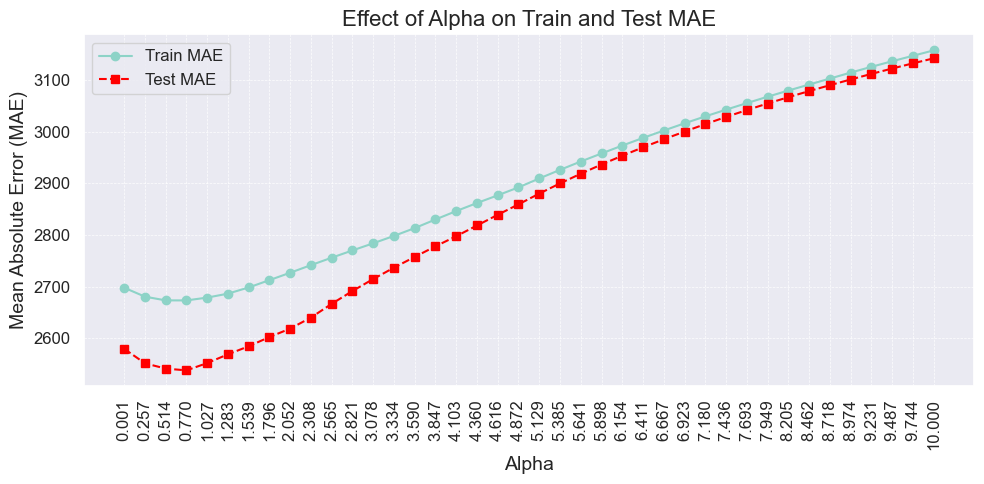

In [166]:
alpha_list = np.linspace(0.001, 10, 40)
train_score = []
test_score = []

for alpha in alpha_list:
    ridge_lr_poly = linear_model.Ridge(alpha=alpha, max_iter=10000)
    ridge_lr_poly.fit(X_train_scaled_poly, y_train_log)
    y_train_predict_poly = np.exp(ridge_lr_poly.predict(X_train_scaled_poly))
    y_test_predict_poly = np.exp(ridge_lr_poly.predict(X_test_scaled_poly))
    train_score.append(metrics.mean_absolute_error(y_train, y_train_predict_poly))
    test_score.append(metrics.mean_absolute_error(y_test, y_test_predict_poly))
 
fig, ax = plt.subplots(figsize=(10, 5))  # Slightly larger height for readability
ax.plot(alpha_list, train_score, label='Train MAE', linestyle='-', marker='o')
ax.plot(alpha_list, test_score, label='Test MAE', linestyle='--', color='red', marker='s')
# Add gridlines
ax.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.9)
# Set labels and title
ax.set_xlabel('Alpha', fontsize=14)
ax.set_ylabel('Mean Absolute Error (MAE)', fontsize=14)
ax.set_title('Effect of Alpha on Train and Test MAE', fontsize=16)
# Customize ticks
ax.set_xticks(alpha_list[::1])  # Show only every 5th tick to reduce clutter
ax.tick_params(axis='x', rotation=90, labelsize=12)
ax.tick_params(axis='y', labelsize=12)
# Add legend
ax.legend(fontsize=12, loc='best')
# Add tighter layout
plt.tight_layout()
plt.show()

<div style="padding: 20px; border: 2px solid #c77220; border-radius: 5px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); max-width: 100%; margin: 0 auto;">
    <ul style="font-size: 18px; font-family: 'Arial', sans-serif; line-height: 1.5em; word-wrap: break-word; overflow-wrap: break-word;">
    <h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
        <li> We see that optimal level of alpha is 0.770 - this is the level that results in the lowest MAE. </li>
        <li> Let's use this alpha to see the metrics that we get. </li>
    </ul>
</div>

In [167]:
ridge_lr_poly = linear_model.Ridge(alpha=0.770)
ridge_lr_poly.fit(X_train_scaled_poly, y_train_log)
y_train_pred = np.exp(ridge_lr_poly.predict(X_train_scaled_poly))
y_test_pred = np.exp(ridge_lr_poly.predict(X_test_scaled_poly))

print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: 0.821
Train MAE: 2673.579
Train MAPE: 18.224


Test R^2: 0.830
Test MAE: 2538.095
Train MAPE: 17.578


<div style="padding: 20px; border: 2px solid #c77220; border-radius: 5px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); max-width: 100%; margin: 0 auto;">
    <ul style="font-size: 18px; font-family: 'Arial', sans-serif; line-height: 1.5em; word-wrap: break-word; overflow-wrap: break-word;">
    <h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
        <li> We see that the MAPE is 17.578% on a test sample indicating that, on average, the model correctly predicts 82.422% of insurance charges that is the best score thus far.  </li>
        <li> Additionally, the model is able to explain 83\% ($R^2$) of the variation in insurance charges. </li>
    </ul>
</div>

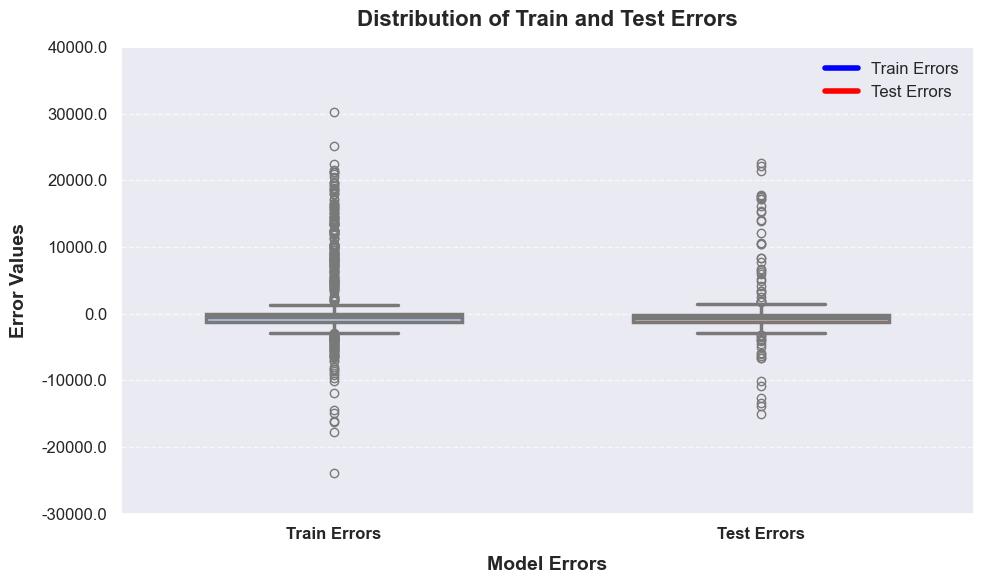

In [168]:
train_error = y_train - y_train_pred
test_error = y_test - y_test_pred

# Prepare data for the boxplot
predict_df = pd.DataFrame(
    {
        'Train Errors': train_error, 
        'Test Errors': test_error
    }
)
# Create a figure for the plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(
    data=predict_df, 
    ax=ax, 
    palette="coolwarm",  # Use a visually appealing color palette
    width=0.6,  # Adjust the width of the boxes
    linewidth=2.5  # Thicker border for better visibility
)
# Add gridlines for better readability
ax.grid(axis='y', linestyle='--', alpha=0.7)
# Customize axis labels and title
ax.set_xlabel('Model Errors', fontsize=14, fontweight='bold', labelpad=10)
ax.set_ylabel('Error Values', fontsize=14, fontweight='bold', labelpad=10)
ax.set_title('Distribution of Train and Test Errors', fontsize=16, fontweight='bold', pad=15)
# Customize tick labels
ax.set_xticks(ax.get_xticks())  # Ensure tick positions are fixed
ax.set_xticklabels(ax.get_xticks(), fontsize=12, fontweight='bold')
ax.set_yticks(ax.get_yticks())  # Ensure tick positions are fixed
ax.set_yticklabels([f"{tick:.1f}" for tick in ax.get_yticks()], fontsize=12)
# Add a legend for clarity (optional)
legend_handles = [
    plt.Line2D([0], [0], color='blue', lw=4, label='Train Errors'),
    plt.Line2D([0], [0], color='red', lw=4, label='Test Errors')
]
ax.legend(handles=legend_handles, loc='upper right', fontsize=12, frameon=False)
ax.set_xticklabels(['Train Errors', 'Test Errors'], fontsize=12, fontweight='bold')
# Display the plot
plt.tight_layout()
plt.show();

<div style="padding: 20px; border: 2px solid #c77220; border-radius: 5px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); max-width: 100%; margin: 0 auto;">
    <ul style="font-size: 18px; font-family: 'Arial', sans-serif; line-height: 1.5em; word-wrap: break-word; overflow-wrap: break-word;">
    <h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
        <li> The boxplot displaying the distribution of training and test errors reveals that the model both overestimates and underestimates insurance fees. However, the median value of the error is closer to zero compared to the models used before. </li>
        <li> However, there are still quite large defitions in predictions. </li>
    </ul>
</div>

<a id="chapter7"></a>
## <div style="text-align:center; border-radius:30px 30px; padding:7px; color:red; margin:0; font-size:90%; font-family:Pacifico; background-color:#d0e4f9; overflow:hidden"><b>         🚨 Conclusions of the whole Analysis </b></div>

<div style="padding: 20px; border: 2px solid #c77220; border-radius: 5px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); max-width: 100%; margin: 0 auto;">
    <ul style="font-size: 18px; font-family: 'Arial', sans-serif; line-height: 1.5em; word-wrap: break-word; overflow-wrap: break-word;">
    <h4 style="margin-bottom: 0;">💡 Interpretation:</h4>
        <li> The model using polynomials of degree 2 with L2-regularization, where alpha is set to 0.770, achieves the highest prediction rate. </li>
            <ul style="margin-left: 20px;">
                <li>The $R^2$ of the test sample is 83% and MAPE is 17.578%, indicating that, on average, the model correctly predicts insurance charges 82.422% of the time.</li>
            </ul>
        </li>
    </ul>
</div>